# Read the TEMP data

In [33]:
import xarray as xr

path='D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/cesmi6gat31rblc210_ANN_210912_998911_cam2_decclimots.nc'

ds=xr.open_dataset(path)
ds

<xarray.Dataset>
Dimensions:          (lev: 26, ilev: 27, time: 788, lat: 48, lon: 96, nbnd: 2)
Coordinates:
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2114-12-16 00:00:00 ... 9984-12-16 00:00:00
  * lat              (lat) float64 -87.16 -83.48 -79.78 ... 79.78 83.48 87.16
  * lon              (lon) float64 0.0 3.75 7.5 11.25 ... 348.8 352.5 356.2
Dimensions without coordinates: nbnd
Data variables: (12/142)
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    P0               float64 ...
    date             (time) int32 ...
    ...               ...
    VD01             (time, lev, lat, lon) float32 ...
    VQ               (time, lev, lat, lon) float32 ...
    VT               (time, lev, lat, lon) float32 ...
    VU               (time, lev, lat, lon) float32 ...
    VV               (time, lev, lat, lon) float32 ...
    Z3               (time, lev, lat, lon) float32 ...
Attributes: (12/17)
    Conventions:      CF-1.0
    source:           CAM
    case:             cesmi6gat31rblc210
    title:            UNSET
    logname:          guido
    host:             c16-10.local
    ...               ...
    climo_script:     ncclimo
    climo_command:    '/groups/ocean/software/software/nco/4.8.0/bin/ncclimo ...
    climo_hostname:   fend03.cluster
    climo_version:    4.8.0
    yrs_averaged:     2110-2119
    NCO:              netCDF Operators version 4.8.0 (Homepage = http://nco.s...

# Extract TEMP

In [34]:
import xarray as xr
import numpy as np

# Extracting the 'TREFHT' variable into a new DataArray
ds = ds['TREFHT']

# Creating a new dataset with just the 'TREFHT' variable
ds = ds.to_dataset()
# Get the length of the current 'time' dimension
num_times = ds.dims['time']

# Create a new time variable starting from 0, increasing in steps of 10
new_time = np.arange(0, num_times * 10, 10)

# Assign this new time variable to the 'time' coordinate of your dataset
ds['time'] = new_time

# ds.info
ds


<xarray.Dataset>
Dimensions:  (time: 788, lat: 48, lon: 96)
Coordinates:
  * time     (time) int32 0 10 20 30 40 50 60 ... 7820 7830 7840 7850 7860 7870
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    TREFHT   (time, lat, lon) float32 ...

In [3]:
# save the ds
ds.to_netcdf('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP.nc')


# Load processed data

In [4]:
# load the ds
import xarray as xr

ds = xr.open_dataset('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 788, lat: 48, lon: 96)
Coordinates:
  * time     (time) int32 0 10 20 30 40 50 60 ... 7820 7830 7840 7850 7860 7870
  * lat      (lat) float64 -87.16 -83.48 -79.78 -76.07 ... 79.78 83.48 87.16
  * lon      (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Data variables:
    TREFHT   (time, lat, lon) float32 ...

# Plot data and check

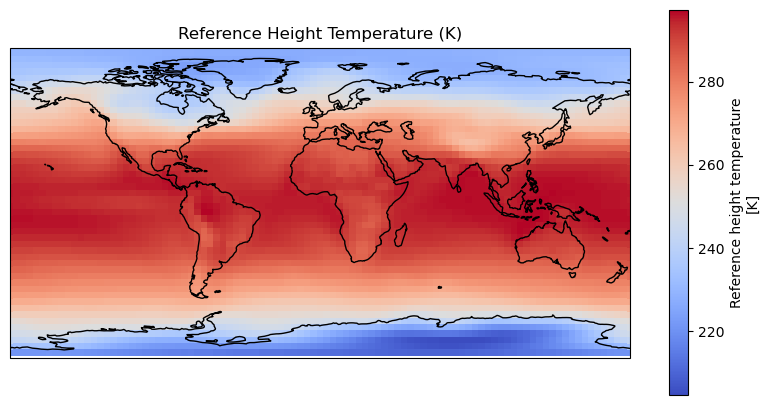

In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs



# Plotting the first value of time for TREFHT on a real world map
plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ds.TREFHT.isel(time=0).plot(ax=ax, x='lon', y='lat', transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=True)
ax.coastlines()
ax.set_global()
plt.title('Reference Height Temperature (K)')
plt.show()


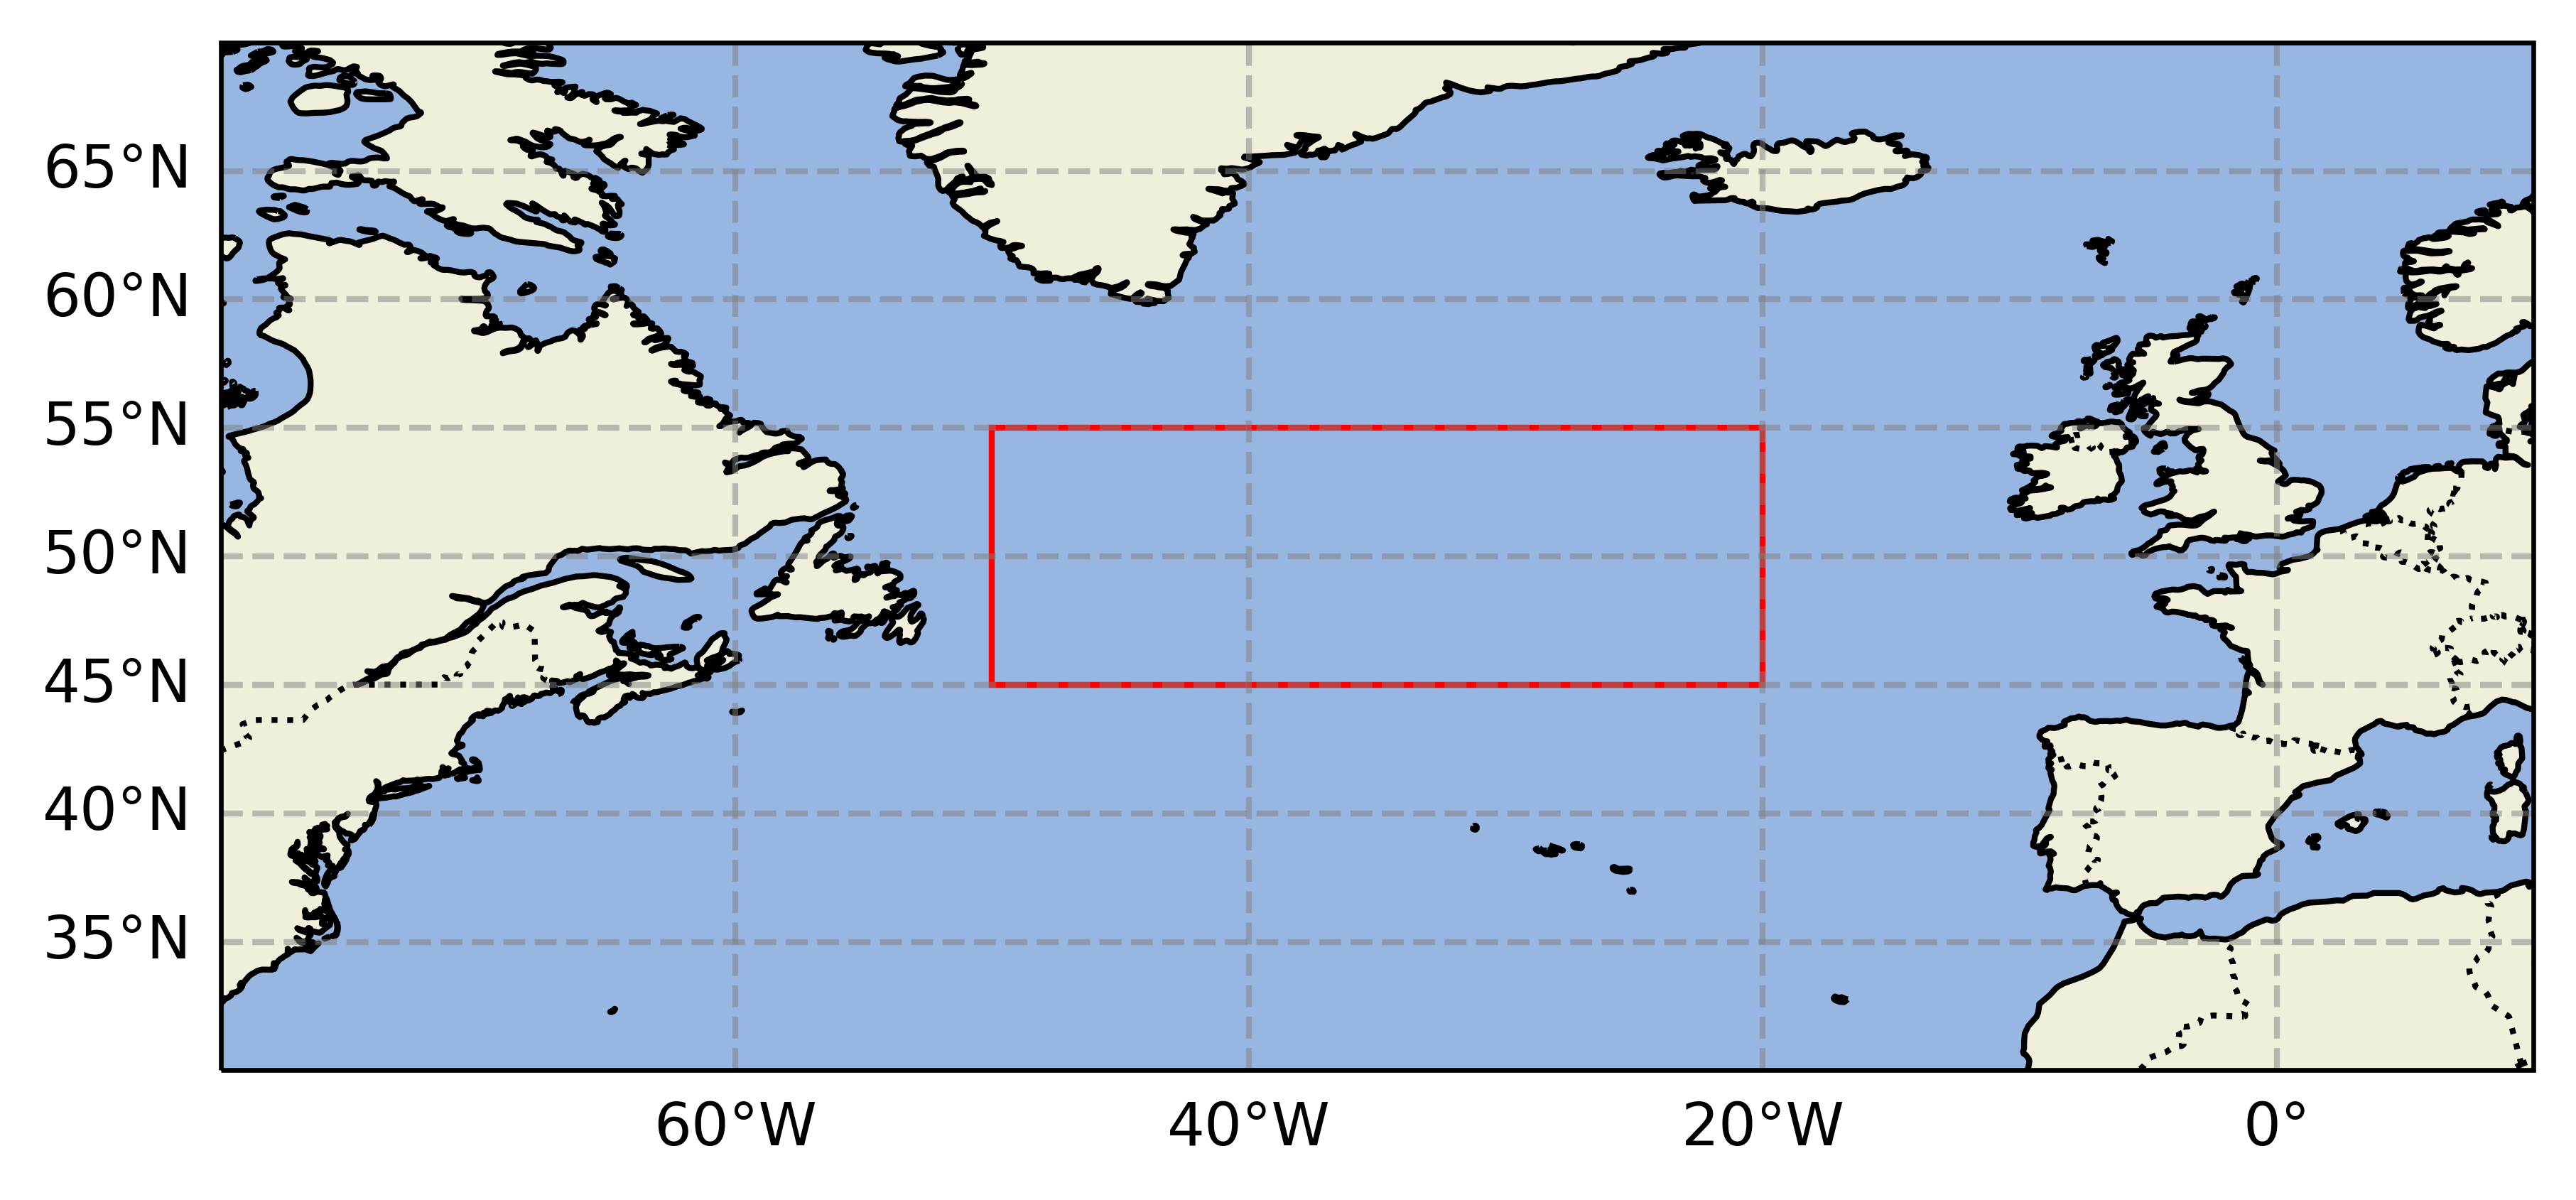

In [6]:
# Re-importing necessary libraries and re-creating the map with the rectangle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Create a figure with an axes set with a projection
fig, ax = plt.subplots(figsize=(7, 6), dpi=600, subplot_kw={'projection': ccrs.PlateCarree()})

# Add features to the map
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-80, 10, 30, 70], crs=ccrs.PlateCarree())  # Set the extent to include a wider area for context

# Plot the rectangle between 45 to 55N and 20 to 50W
rectangle = plt.Rectangle((-50, 45), 30, 10, linewidth=1, edgecolor='r', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(rectangle)

# 45 to 55N and 20 to 50W

# Adding gridlines and labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False

# plt.title('Map with Rectangle between 45 to 55N and 20 to 50W')
plt.show()


In [9]:
import xarray as xr

# We define the bounding box
lat_bounds = (45, 55)
lon_bounds = (-50, -20)  # Adjusted for dataset longitude coordinates (0 to 360)

# Extracting data within the bounding box
ds_sub = ds.sel(lat=slice(*lat_bounds), lon=slice(360+lon_bounds[0], 360+lon_bounds[1]))

ds_sub.info()
ds_sub

xarray.Dataset {
dimensions:
	time = 788 ;
	lat = 3 ;
	lon = 8 ;

variables:
	int32 time(time) ;
	float64 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	float64 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
	float32 TREFHT(time, lat, lon) ;
		TREFHT:units = K ;
		TREFHT:long_name = Reference height temperature ;
		TREFHT:cell_methods = time: mean ;

// global attributes:
}

<xarray.Dataset>
Dimensions:  (time: 788, lat: 3, lon: 8)
Coordinates:
  * time     (time) int32 0 10 20 30 40 50 60 ... 7820 7830 7840 7850 7860 7870
  * lat      (lat) float64 46.39 50.1 53.81
  * lon      (lon) float64 311.2 315.0 318.8 322.5 326.2 330.0 333.8 337.5
Data variables:
    TREFHT   (time, lat, lon) float32 ...

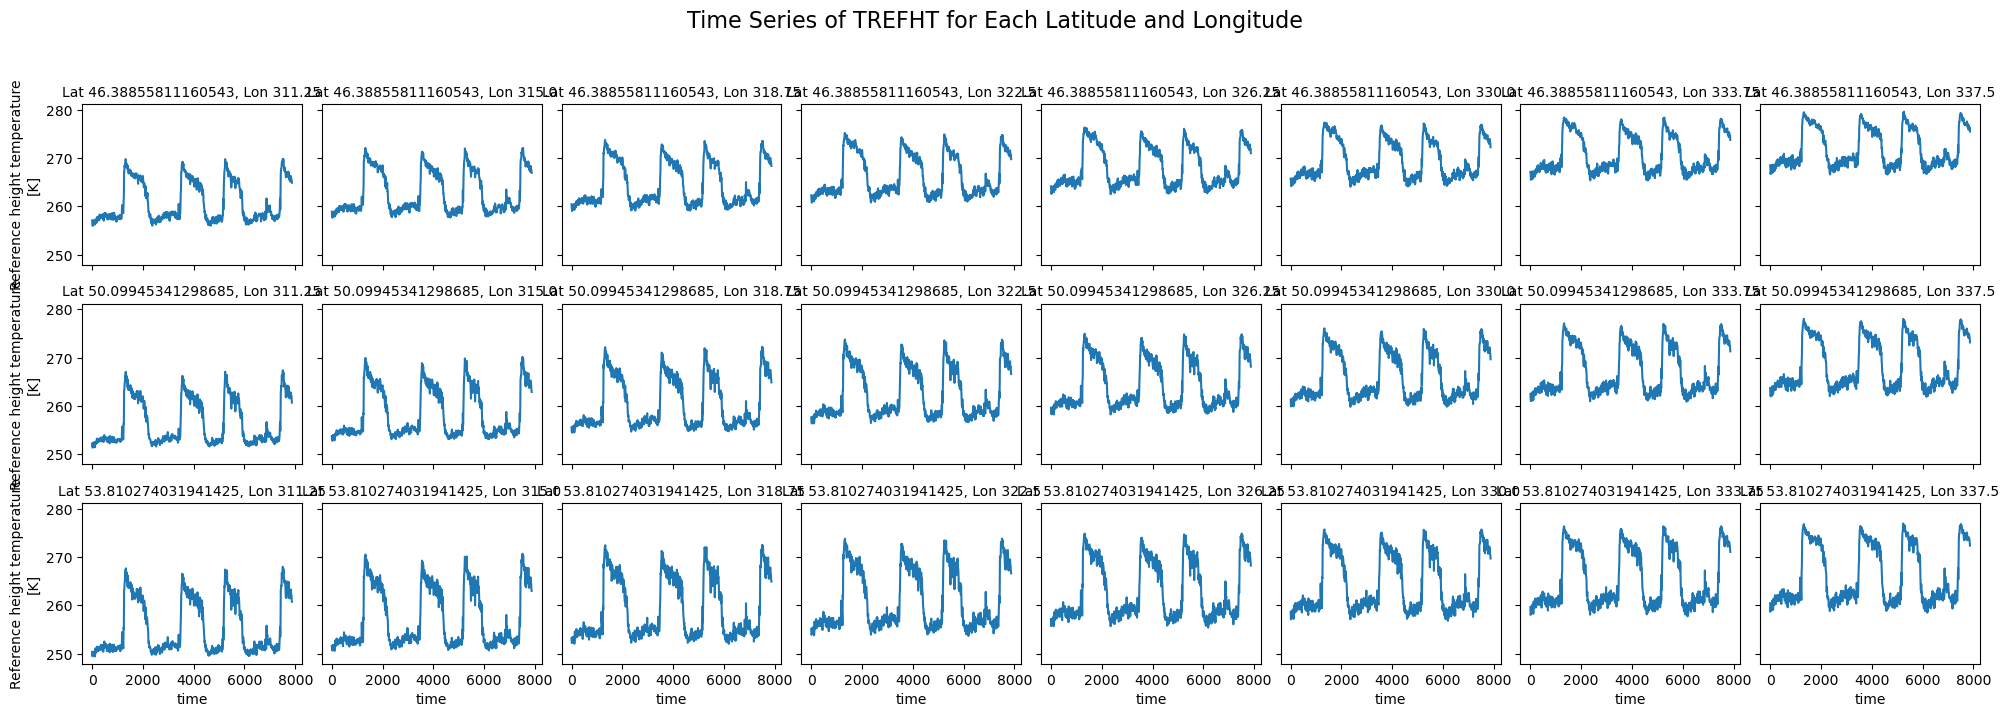

In [13]:
import matplotlib.pyplot as plt
import numpy as np


# Determine the number of rows for plotting in 8 columns
num_lons = len(ds_sub.lon)  # Number of longitude points
num_lats = len(ds_sub.lat)  # Number of latitude points
num_plots = num_lats * num_lons  # Total number of plots
num_rows = np.ceil(num_plots / 8).astype(int)  # Calculate rows needed

fig, axs = plt.subplots(num_rows, 8, figsize=(20, num_rows * 2.5), sharex=True, sharey=True)
fig.suptitle('Time Series of TREFHT for Each Latitude and Longitude', fontsize=16)

# Flatten the axes array for easy access
axs = axs.flatten()

# Iterate over each latitude and longitude to plot
for i, lat in enumerate(ds_sub.lat.values):
    for j, lon in enumerate(ds_sub.lon.values):
        index = i * num_lons + j  # Calculate subplot index
        ax = axs[index]
        ds_sub.sel(lat=lat, lon=lon)['TREFHT'].plot(ax=ax)
        ax.set_title(f'Lat {lat}, Lon {lon}', fontsize=10)  # Correct way to set title
        

# turn off x and y labels for all but the bottom row and leftmost column
for ax in axs:
    ax.label_outer()
    




# Hide any extra subplots that aren't used
for k in range(num_plots, len(axs)):
    axs[k].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# Get the bootstrap mean

In [14]:
import xarray as xr
import numpy as np

# Assume ds_sub is your dataset containing the 'TREFHT' variable

def bootstrap_spatial_mean_time_series(ds, n_bootstraps=1000):
    """
    Perform spatial bootstrap resampling to calculate mean time series.

    Args:
        ds: xarray.Dataset containing the 'TREFHT' variable.
        n_bootstraps: Number of bootstrap samples to generate.

    Returns:
        An xarray.DataArray containing the mean time series for each bootstrap sample.
    """
    n_lats = ds.dims['lat']
    n_lons = ds.dims['lon']
    bootstrap_means = np.zeros((n_bootstraps, ds.dims['time']))

    for i in range(n_bootstraps):
        # Randomly sample lat and lon indices with replacement
        sampled_lat_indices = np.random.choice(n_lats, n_lats, replace=True)
        sampled_lon_indices = np.random.choice(n_lons, n_lons, replace=True)
        # Generate a bootstrap sample by selecting from the original dataset
        bootstrap_sample = ds.isel(lat=sampled_lat_indices, lon=sampled_lon_indices)
        # Calculate the mean time series of this bootstrap sample across all latitudes and longitudes
        mean_time_series = bootstrap_sample.mean(dim=['lat', 'lon'])
        bootstrap_means[i, :] = mean_time_series['TREFHT']

    # Convert the results to an xarray DataArray for convenience
    bootstrap_means_da = xr.DataArray(bootstrap_means, dims=['bootstrap', 'time'],
                                      coords={'bootstrap': range(n_bootstraps), 'time': ds['time']})
    
    return bootstrap_means_da




In [19]:
# Example usage
n_bootstraps = 1000  # Number of bootstrap samples to generate
TEMP_bootstrap_means = bootstrap_spatial_mean_time_series(ds_sub, n_bootstraps)
TEMP_bootstrap_means.values


array([[259.11251831, 258.14907837, 257.82015991, ..., 269.4586792 ,
        268.87521362, 268.23117065],
       [262.80361938, 262.03979492, 261.27761841, ..., 271.68908691,
        271.42852783, 270.71105957],
       [258.25131226, 257.20266724, 257.02508545, ..., 269.40518188,
        268.79190063, 268.26437378],
       ...,
       [258.69290161, 257.61352539, 257.46740723, ..., 269.71896362,
        269.09103394, 268.50964355],
       [257.86810303, 256.83230591, 256.65075684, ..., 269.11721802,
        268.472229  , 267.95089722],
       [257.46157837, 256.55911255, 256.24282837, ..., 267.6791687 ,
        266.96640015, 266.28762817]])

In [20]:
# save the bootstrap_means_da
TEMP_bootstrap_means.to_netcdf('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP_bootstrap_means.nc')

In [ ]:
# read the bootstrap_means_da
import xarray as xr

TEMP_bootstrap_means = xr.open_dataarray('D:/VScode/Paleoclimate_causality/CCSM4_ANN_data/processed/TEMP_bootstrap_means.nc')

In [21]:
TEMP_bootstrap_means.values.shape

(1000, 788)

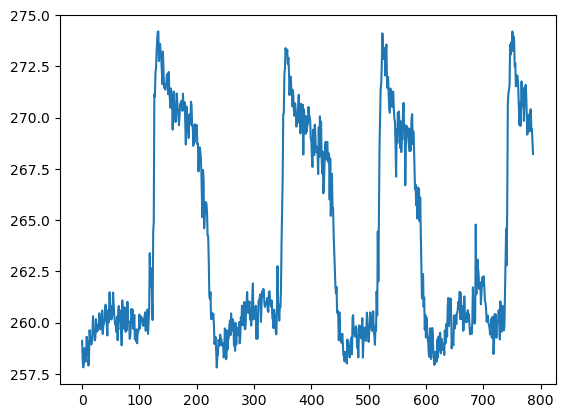

In [22]:
plt.plot(TEMP_bootstrap_means.values[0, :])